In [2]:
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

#Pour faire de jolie figures:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],  # You can change this font if you prefer
    "axes.labelsize": 20,  # Adjust as needed
    "axes.titlesize": 20,  # Adjust as needed
    "xtick.labelsize": 14,  # Adjust as needed
    "ytick.labelsize": 14,  # Adjust as needed
    "legend.fontsize": 12,  # Adjust as needed
    "figure.figsize": (15, 8),  # Adjust as needed
    "figure.dpi": 600  # Adjust as needed
})

# Distribution Gaussienne et largeur à mi-hauteur

Le but de ce notebook est d'illustrer une partie du TD1 du cours de Physique Quantique de l'université Paris Cité.

Nous nous intéressons à vérifier "à la main" la relation vue en TD entre la variance d'une distribution Gaussienne et sa largeur à mi-hauteur.

Traçons d'abord le profil d'une densité Gaussienne de moyenne 0 et de variance 1.

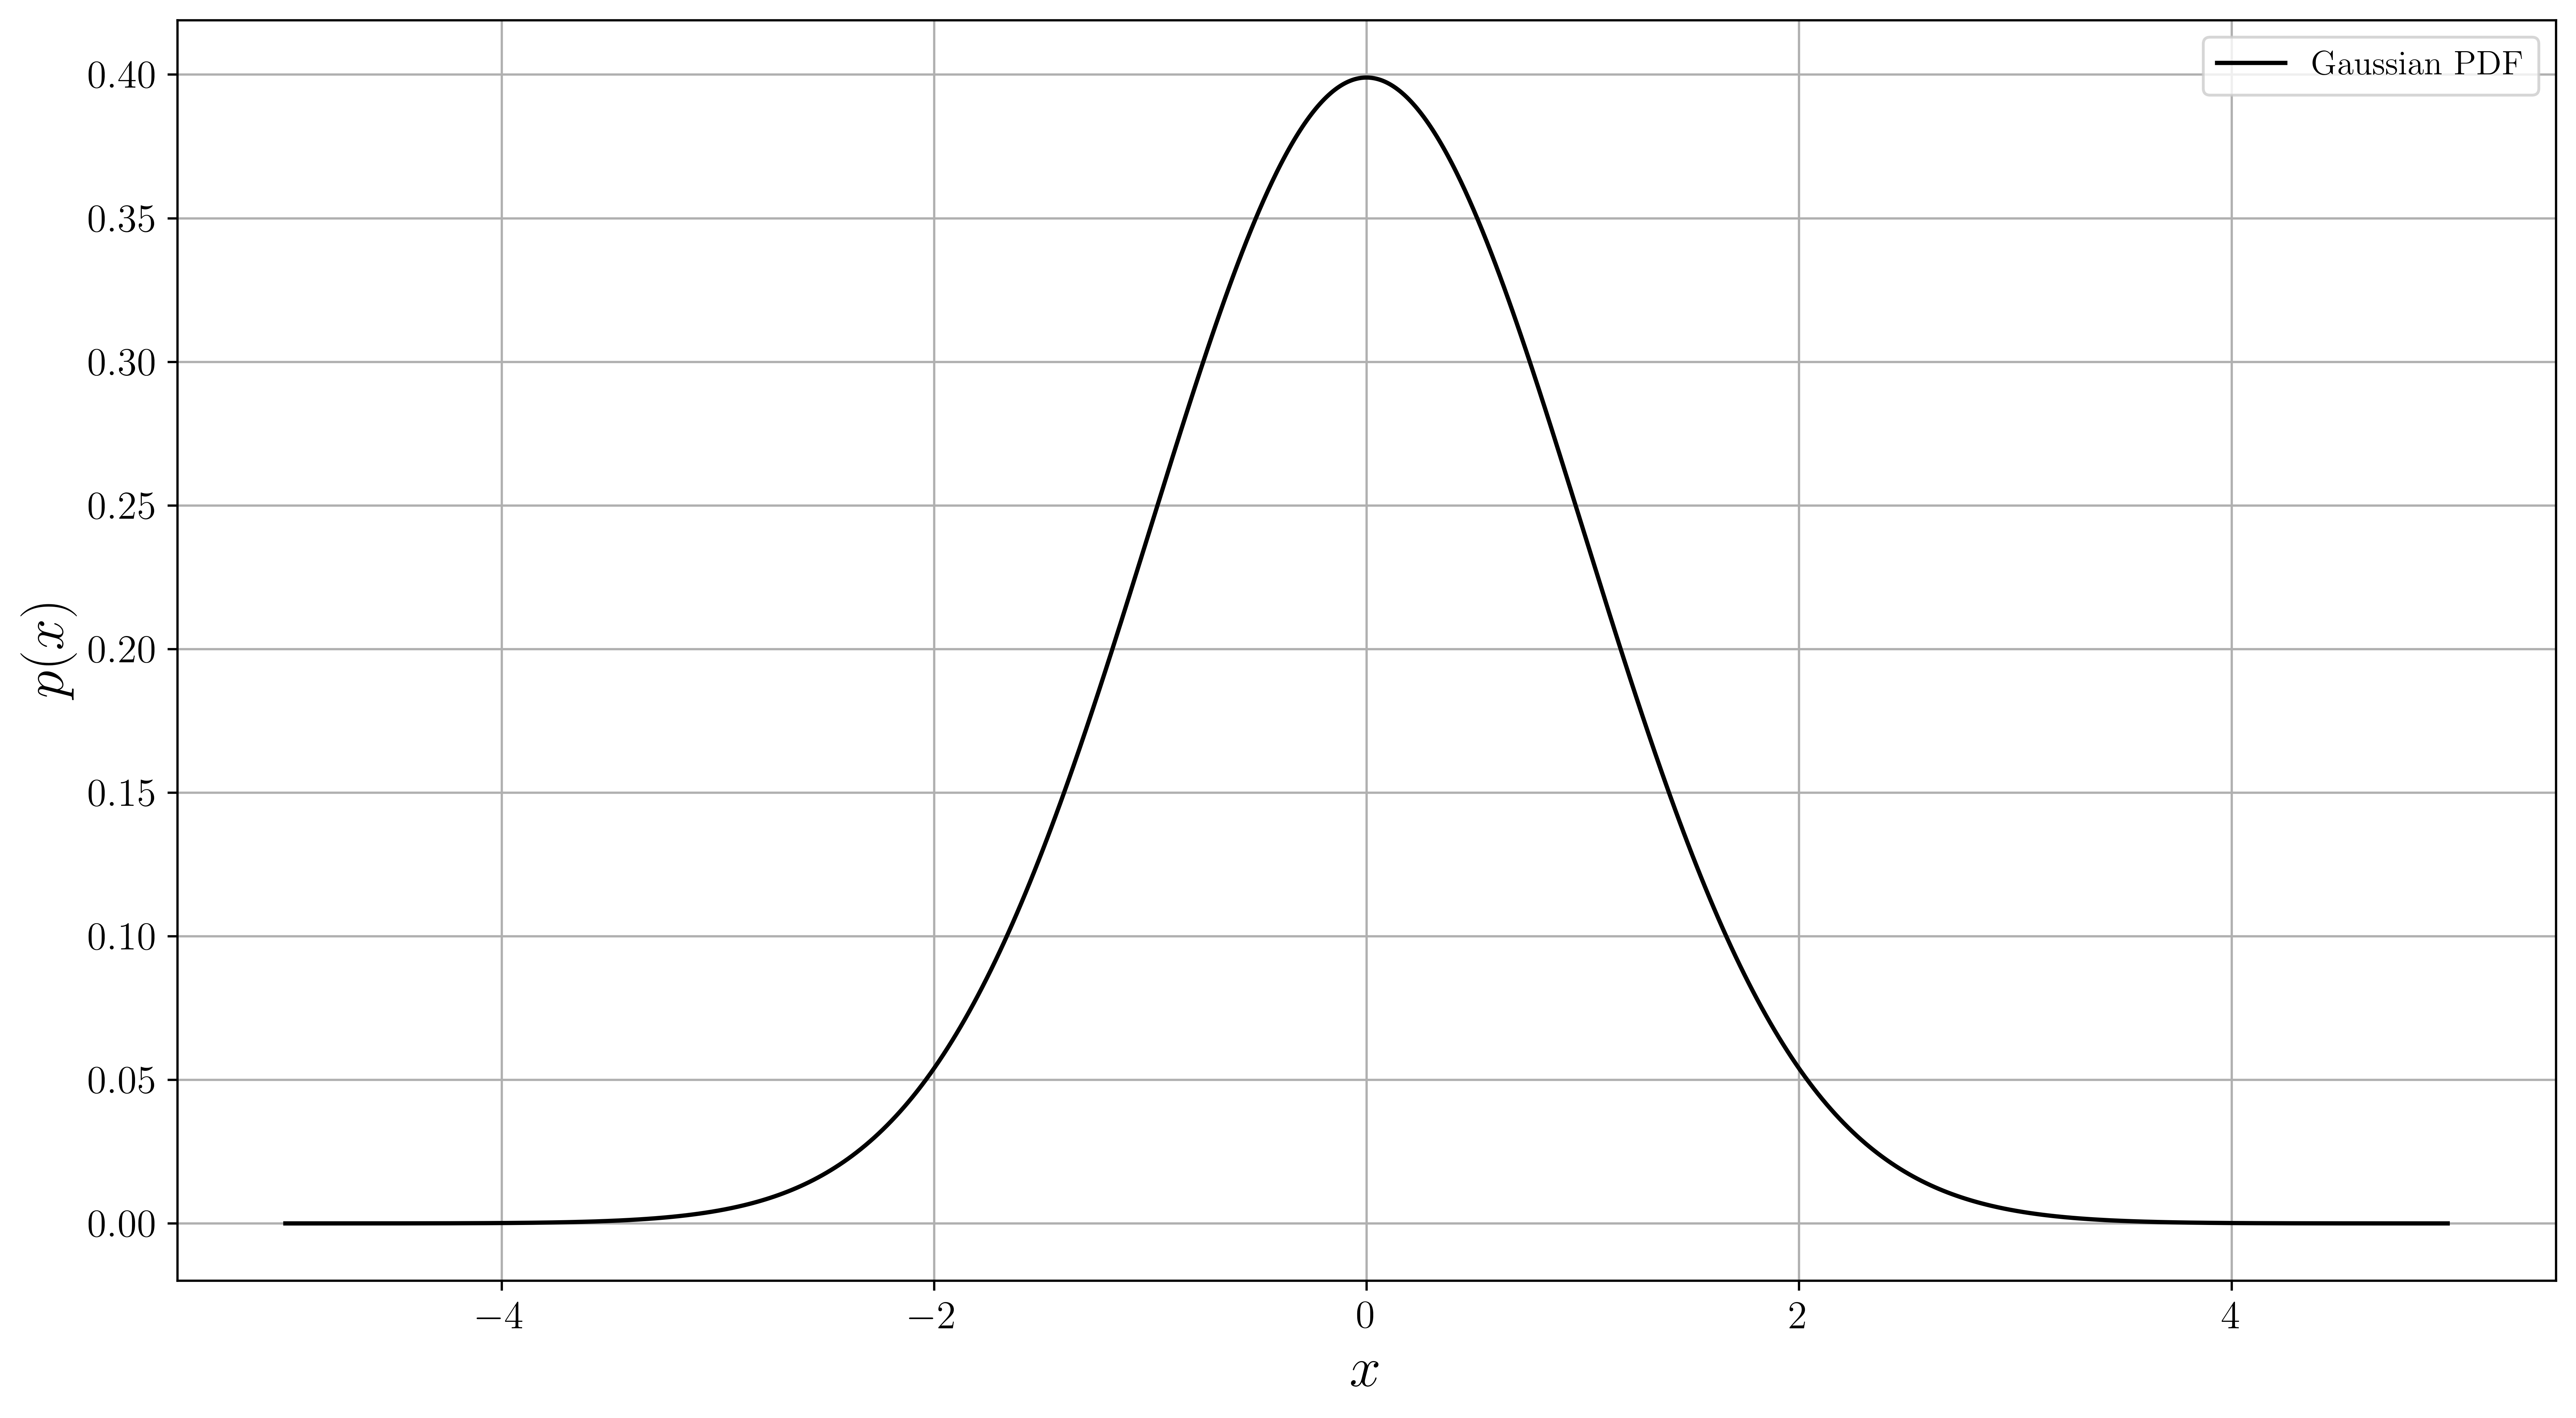

In [3]:
mu = 0. #moyenne de la distribution
sigma = 1. #écart-type de la distribution

x = np.linspace(-5, 5, 1000)
pdf_gauss = stats.norm.pdf(x, mu, sigma)

plt.figure()

plt.plot(x, pdf_gauss, label='Gaussian PDF', c='k')
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')

plt.grid()

plt.legend()

plt.show()

On peut maintenant échantilloner selon une distribution gaussienne :)

In [4]:
n_samples = 100_000

samples_gauss = stats.norm.rvs(loc=mu, scale=sigma, size=n_samples)

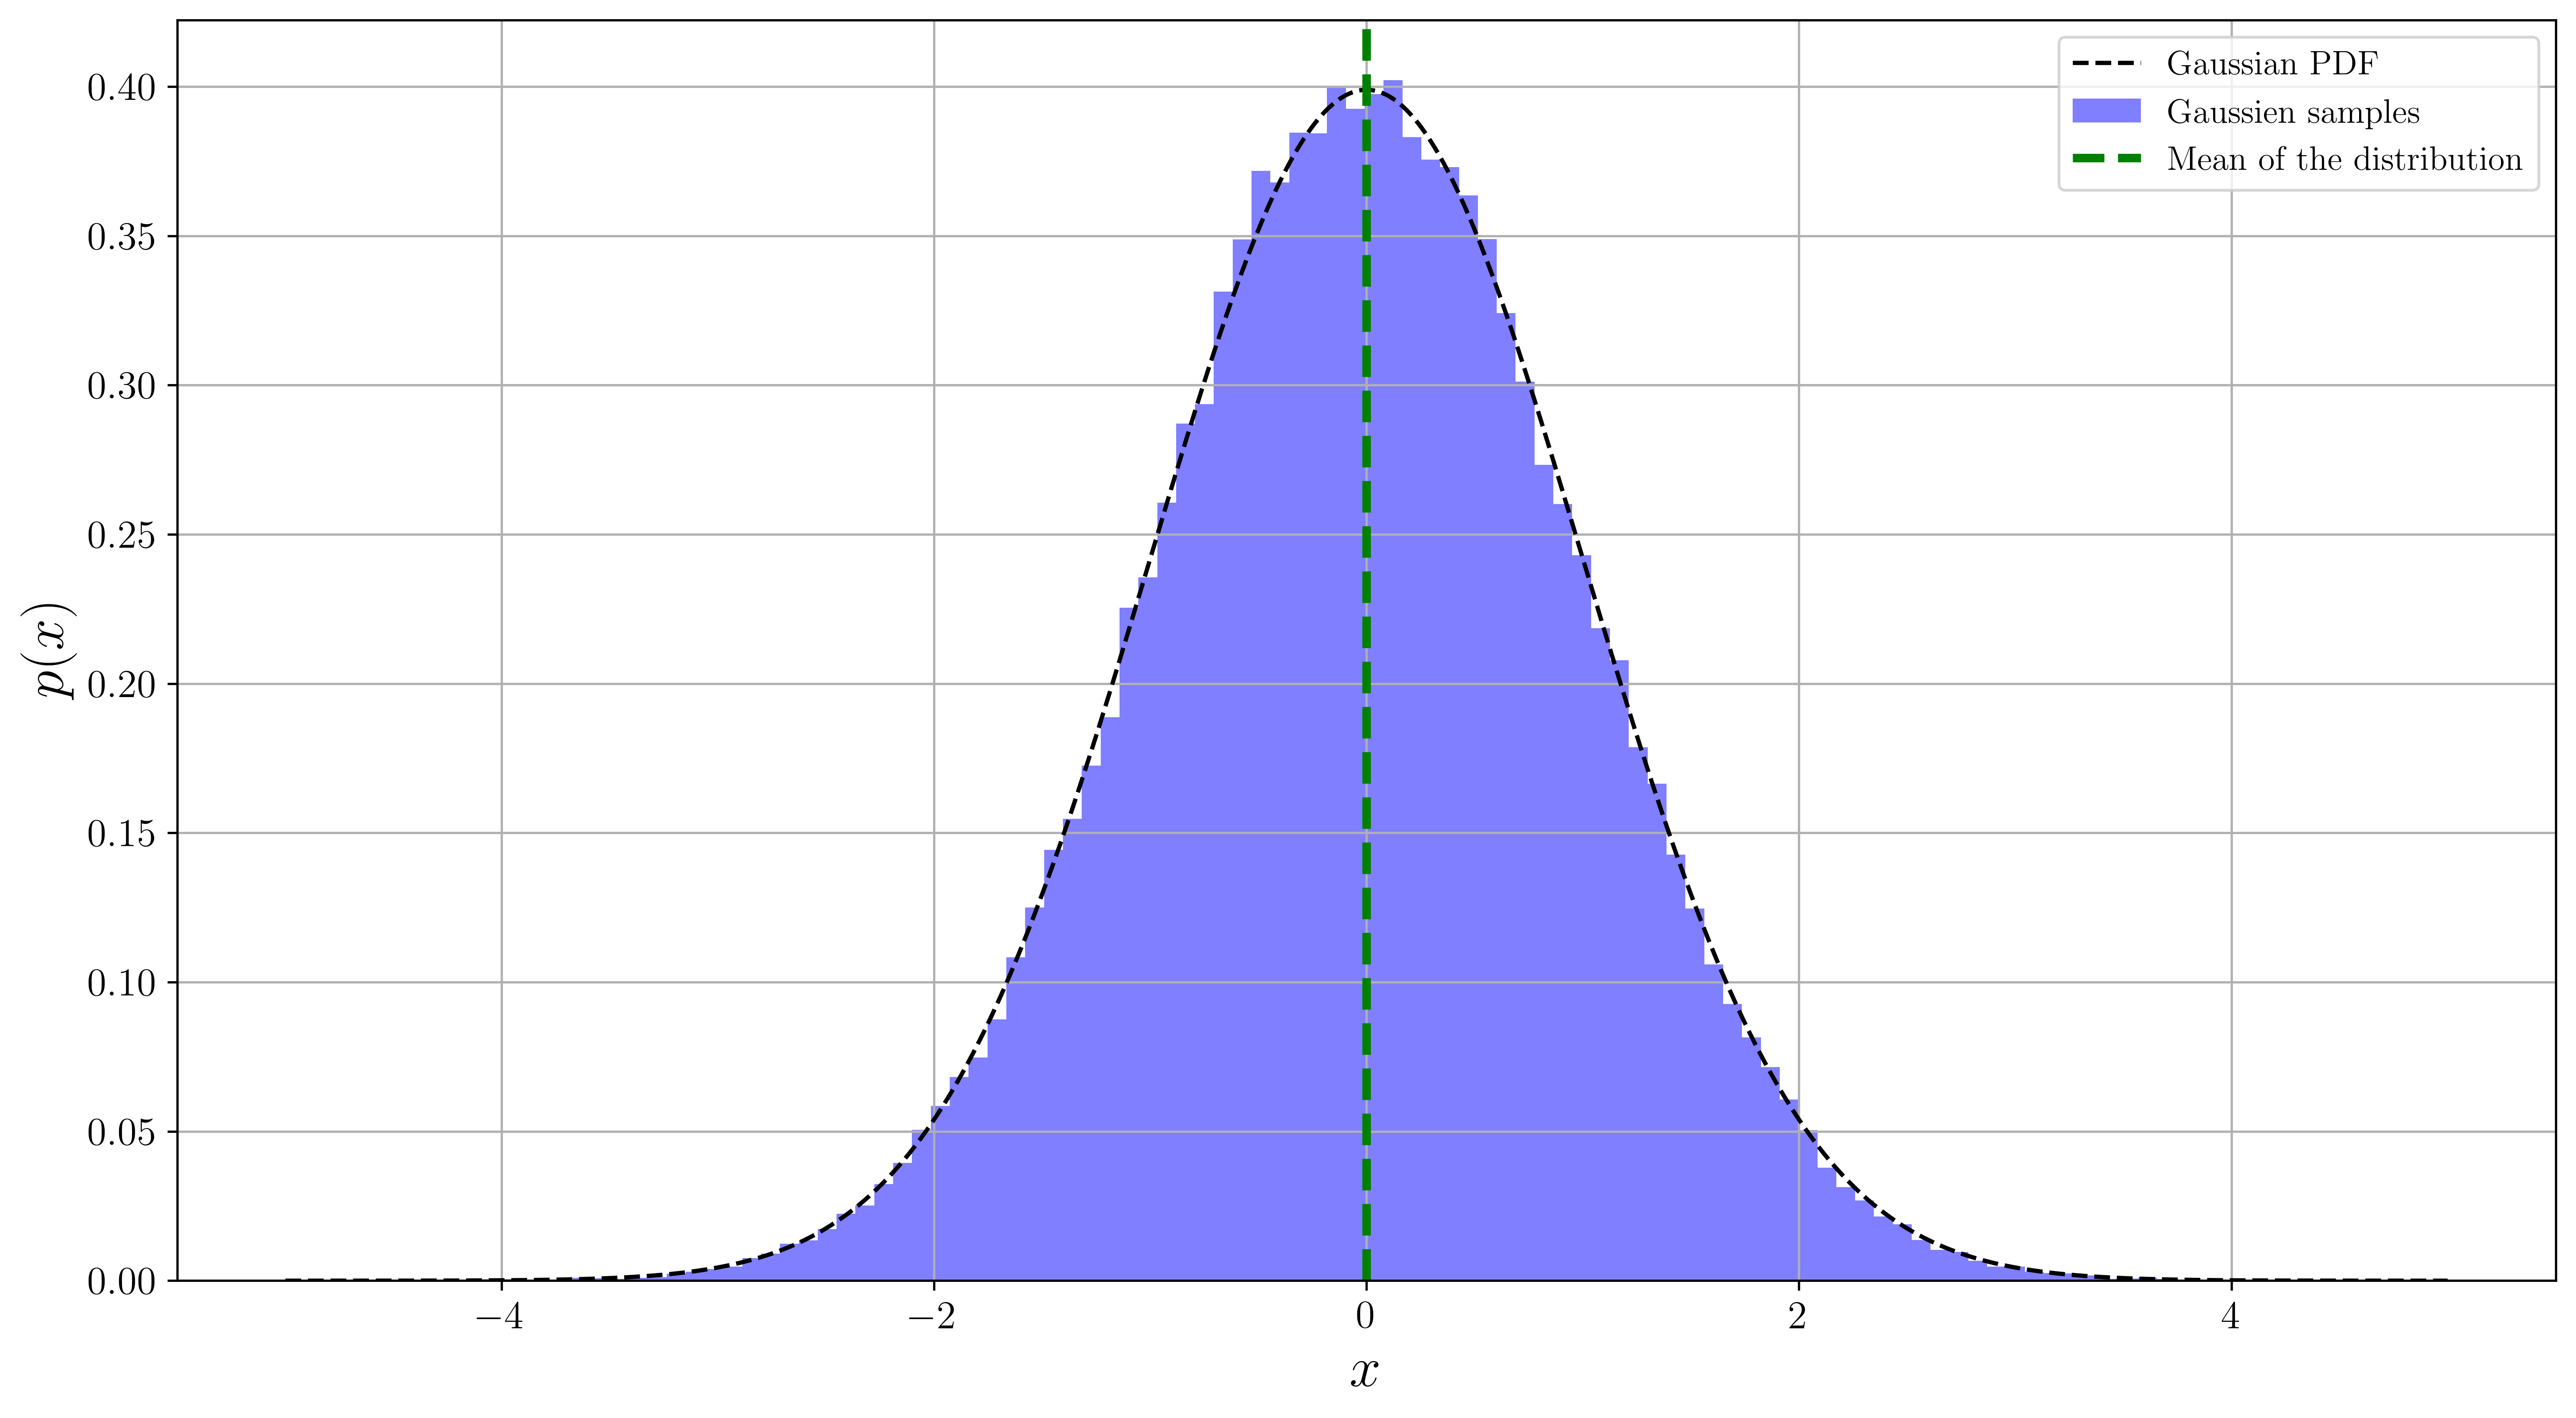

In [7]:
#Let's plot the histogram of the samples

plt.figure()

plt.plot(x, pdf_gauss, label='Gaussian PDF', c='k', ls='--')
plt.hist(samples_gauss, bins=100, density=True, alpha=0.5, color='blue', label='Gaussien samples')
plt.axvline(mu, color='green', ls='--', lw=3, label='Mean of the distribution')

plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')

plt.grid()
plt.legend()

plt.show()

On peut calculer la variance des échantillons et vérifier qu'elle correspond à celle de la distribution gaussienne de départ.

In [8]:
std_samples = np.std(samples_gauss) #Exercice: implémentez la formule du calcul de l'écart-type pour un ensemble fini d'échantillons.
print(f"Standard deviation of the samples: {std_samples:.4f}")
np.isclose(std_samples, sigma, atol=1e-2)

Standard deviation of the samples: 0.9951


True

On a vu en TD que la largeur à mi-hauteur de la gaussienne vaut $2\sqrt{2\log{2}}\sigma$. Vérifions cela:

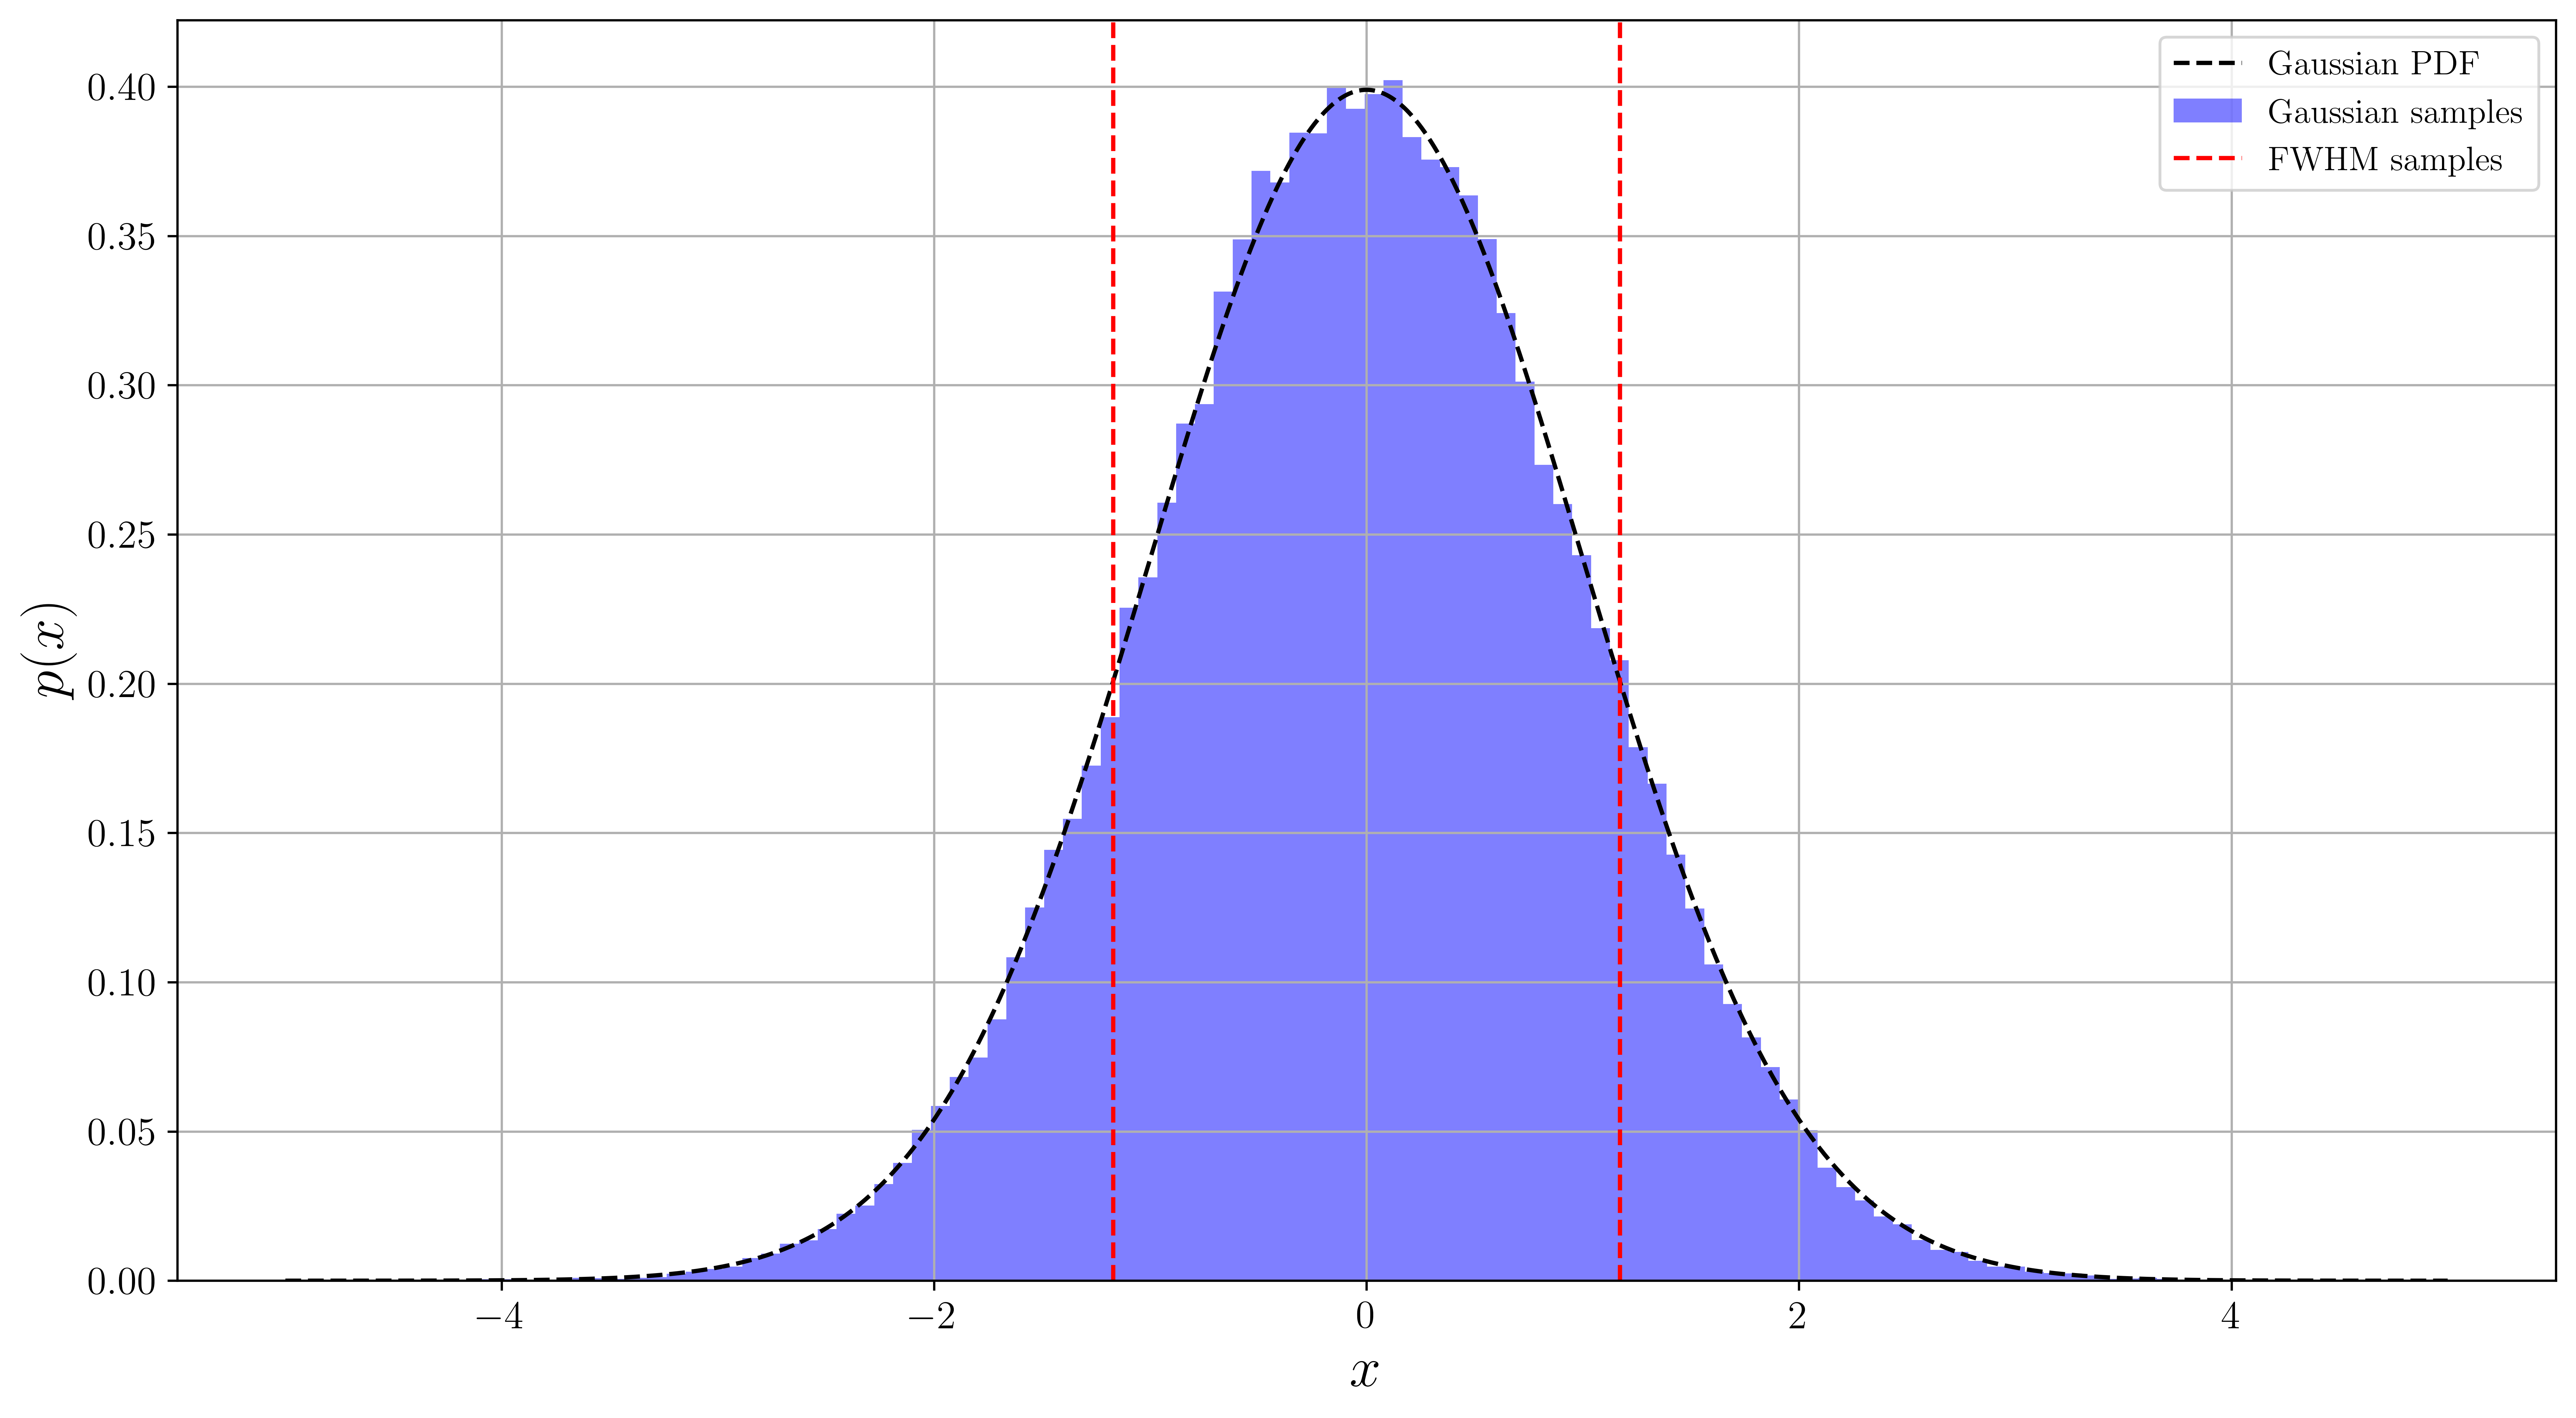

In [9]:
FWHM = 2*np.sqrt(2*np.log(2))*std_samples #Expression calculée en TD

plt.figure()

plt.plot(x, pdf_gauss, label='Gaussian PDF', c='k', ls='--')
plt.hist(samples_gauss, bins=100, density=True, alpha=0.5, color='blue', label='Gaussian samples')
plt.axvline(mu-FWHM/2, c='red', label='FWHM samples', ls='--')
plt.axvline(mu+FWHM/2, c='red', ls='--')

plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')

plt.grid()
plt.legend()

plt.show()

Empiriquement cela semble correcte mais vérifions le numériquement. Pour trouver la largeur à mi-hauteur on peut résoudre un problème d'optimisation. On sait que la gaussienne est maximale en $x=\mu$. Nous pouvons donc utiliser cette information pour écrire une fonction objectif à optimiser:

In [10]:
def objective_function(x, mu=mu):
    max_gaussian = stats.norm.pdf(mu, mu, sigma)
    return np.abs(stats.norm.pdf(x, mu, sigma) - max_gaussian/2) #On utilise comme distance la valeur absolue mais on pourrait utiliser autre chose

In [11]:
from scipy.optimize import minimize_scalar

In [12]:
res = minimize_scalar(objective_function, args=(mu,), bounds=[mu, mu+5*sigma]) #On cherche la solution dans l'intervalle [mu, mu+5*sigma]
res

 message: Solution found.
 success: True
  status: 0
     fun: 2.8084108005810293e-07
       x: 1.1774088267314395
     nit: 19
    nfev: 19

In [13]:
x_half_max_right = res.x #On récupère la valeur de x pour laquelle la gaussienne est à la moitié de sa valeur maximale à droite

In [14]:
#Idem à gauche
res = minimize_scalar(objective_function, args=(mu,), bounds=[mu-5*sigma, mu])
res

 message: Solution found.
 success: True
  status: 0
     fun: 2.8084108005810293e-07
       x: -1.1774088267314395
     nit: 19
    nfev: 19

In [15]:
x_half_max_left = res.x

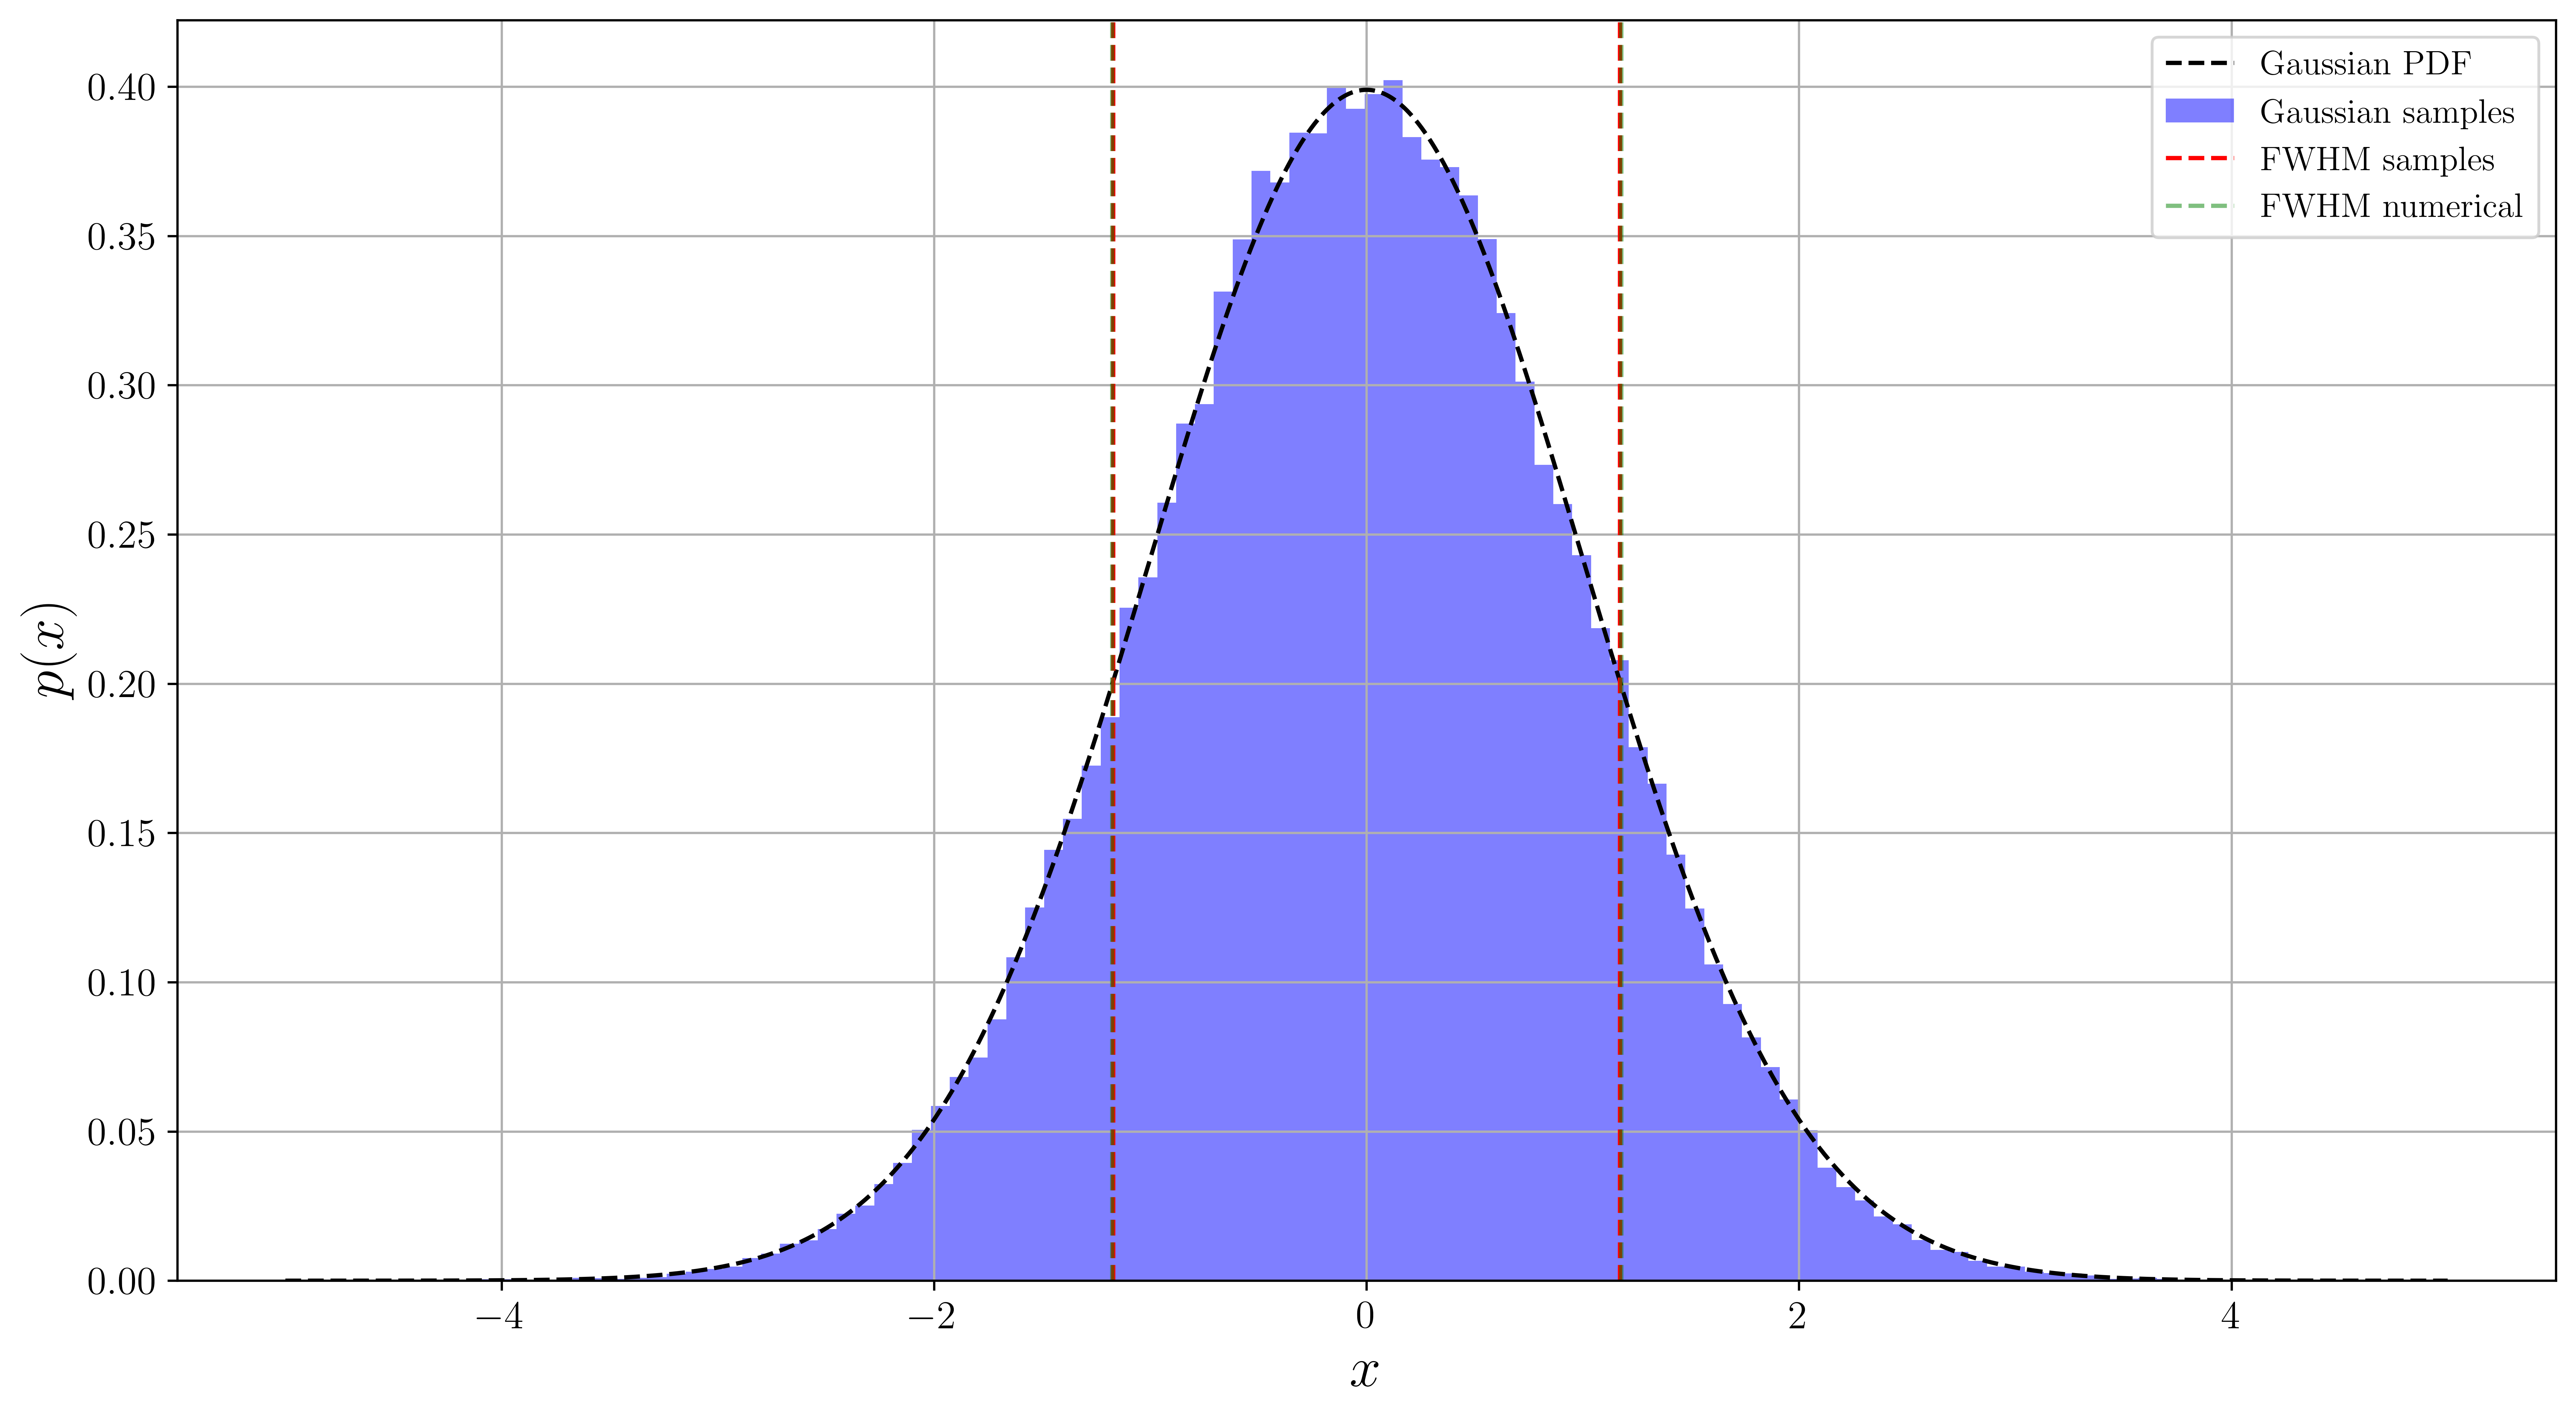

In [16]:
plt.figure()

plt.plot(x, pdf_gauss, label='Gaussian PDF', c='k', ls='--')
plt.hist(samples_gauss, bins=100, density=True, alpha=0.5, color='blue', label='Gaussian samples')
plt.axvline(mu + FWHM/2, c='red', label='FWHM samples', ls='--')
plt.axvline(mu - FWHM/2, c='red', ls='--')

plt.axvline(x_half_max_right, c='green', label='FWHM numerical', ls='--', alpha=0.5)
plt.axvline(x_half_max_left, c='green', ls='--', alpha=0.5)

plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')

plt.grid()
plt.legend()

plt.show()


In [17]:
print(f"Difference between FWHM from samples and numerical calculation: {FWHM - (x_half_max_right - x_half_max_left):.4f}")

Difference between FWHM from samples and numerical calculation: -0.0114


On trouve le même résultat au millième près. La différence entre les deux méthodes peut avoir deux origines:
- Le nombre limité d'échantillons gaussien. **Exercice**: Faites varier le nombre d'échantillons et regarder comment la qualité de l'estimation varie
- La qualité de l'optimisation (qui a une précision à $10^{-7}$ donc qui a une contribution très marginale).
- D'éventuels effets numériques. 

**Exercice**

- Refaites tourner le code en modifiant les valeurs de `mu` et `sigma`, resp. la moyenne et la variance de la gaussienne. Regardez le comportement de la distribution.
- Ecrivez un code analogue pour la distribution exponentielle également étudiée en TD1.
- Continuez à vous amuser avec d'autres distributions :) (https://docs.scipy.org/doc/scipy/tutorial/stats.html)